**Data Fetching**

In [4]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import seaborn as sns
import itertools
import statsmodels.api as sm
import pandas as pd

In [5]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['axes.labelsize']=15
matplotlib.rcParams['xtick.labelsize']=12
matplotlib.rcParams['ytick.labelsize']=12
matplotlib.rcParams['text.color']='k'

In [6]:
import pandas as pd
df=pd.read_excel('https://github.com/RachanaVarma/tcs_ion/blob/main/superstoresales.xls?raw=true',parse_dates=['Order Date'])
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


**CLEANING OF DATA**

**Furniture**

In [7]:
furniture=df.loc[df['Category']  =='Furniture']
furniture

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9962,9963,CA-2015-168088,2015-03-19,2015-03-22,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,Texas,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
9964,9965,CA-2016-146374,2016-12-05,2016-12-10,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,Delaware,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
9980,9981,US-2015-151435,2015-09-06,2015-09-09,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,Louisiana,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028


In [8]:
furniture['Order Date'].min(),furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [9]:
cols = ['Row ID','Order ID','Ship Date','Ship Mode','Customer ID','Customer Name','Segment','Country','City','State','Postal Code','Region','Product ID','Category','Sub-Category','Product Name','Quantity','Discount','Profit']
furniture.drop(cols,axis=1,inplace=True)
furniture

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
3,2015-10-11,957.5775
5,2014-06-09,48.8600
10,2014-06-09,1706.1840
...,...,...
9962,2015-03-19,383.4656
9964,2016-12-05,13.4000
9980,2015-09-06,85.9800
9989,2014-01-21,25.2480


In [10]:
furniture=furniture.sort_values('Order Date')
furniture

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940
...,...,...
7636,2017-12-29,258.750
7632,2017-12-29,1207.840
5131,2017-12-29,101.120
7635,2017-12-29,300.980


In [11]:
furniture=furniture.sort_values('Order Date')
furniture.isnull().sum()
furniture=furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture=furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

**Office_Supplies**

In [12]:
Office_Supplies=df.loc[df['Category']  =='Office Supplies']
Office_Supplies

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656
8,9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825
9,10,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900,5,0.0,34.4700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,9983,US-2016-157728,2016-09-22,2016-09-28,Standard Class,RC-19960,Ryan Crowe,Consumer,United States,Grand Rapids,Michigan,49505,Central,OFF-PA-10002195,Office Supplies,Paper,"RSVP Cards & Envelopes, Blank White, 8-1/2"" X ...",35.560,7,0.0,16.7132
9984,9985,CA-2015-100251,2015-05-17,2015-05-23,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,New York,11561,East,OFF-LA-10003766,Office Supplies,Labels,Self-Adhesive Removable Labels,31.500,10,0.0,15.1200
9985,9986,CA-2015-100251,2015-05-17,2015-05-23,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,New York,11561,East,OFF-SU-10000898,Office Supplies,Supplies,Acme Hot Forged Carbon Steel Scissors with Nic...,55.600,4,0.0,16.1240
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200


In [13]:
Office_Supplies['Order Date'].min(),Office_Supplies['Order Date'].max()
cols = ['Row ID','Order ID','Ship Date','Ship Mode','Customer ID','Customer Name','Segment','Country','City','State','Postal Code','Region','Product ID','Category','Sub-Category','Product Name','Quantity','Discount','Profit']
Office_Supplies.drop(cols,axis=1,inplace=True)
Office_Supplies
Office_Supplies=Office_Supplies.sort_values('Order Date')
Office_Supplies

,Order Date,Sales
7980,2014-01-03,16.448
740,2014-01-04,272.736
739,2014-01-04,11.784
741,2014-01-04,3.540
1759,2014-01-05,19.536
...,...,...
5091,2017-12-30,3.024
1297,2017-12-30,20.720
908,2017-12-30,52.776
1296,2017-12-30,13.904


In [14]:
Office_Supplies=Office_Supplies.sort_values('Order Date')
Office_Supplies
Office_Supplies=Office_Supplies.sort_values('Order Date')
Office_Supplies.isnull().sum()
Office_Supplies=Office_Supplies.groupby('Order Date')['Sales'].sum().reset_index()
Office_Supplies=Office_Supplies.set_index('Order Date')
Office_Supplies.index

DatetimeIndex(['2014-01-03', '2014-01-04', '2014-01-05', '2014-01-06',
               '2014-01-07', '2014-01-09', '2014-01-10', '2014-01-13',
               '2014-01-16', '2014-01-18',
               ...
               '2017-12-21', '2017-12-22', '2017-12-23', '2017-12-24',
               '2017-12-25', '2017-12-26', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=1148, freq=None)

**Technology**

In [15]:
technology=df.loc[df['Category']  =='Technology']
technology

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7,8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152
11,12,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,TEC-PH-10002033,Technology,Phones,Konftel 250 Conference phone - Charcoal black,911.424,4,0.2,68.3568
19,20,CA-2014-143336,2014-08-27,2014-09-01,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,California,94109,West,TEC-PH-10001949,Technology,Phones,Cisco SPA 501G IP Phone,213.480,3,0.2,16.0110
26,27,CA-2016-121755,2016-01-16,2016-01-20,Second Class,EH-13945,Eric Hoffmann,Consumer,United States,Los Angeles,California,90049,West,TEC-AC-10003027,Technology,Accessories,Imation 8GB Mini TravelDrive USB 2.0 Flash Drive,90.570,3,0.0,11.7741
35,36,CA-2016-117590,2016-12-08,2016-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,Texas,75080,Central,TEC-PH-10004977,Technology,Phones,GE 30524EE4,1097.544,7,0.2,123.4737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9983,9984,US-2016-157728,2016-09-22,2016-09-28,Standard Class,RC-19960,Ryan Crowe,Consumer,United States,Grand Rapids,Michigan,49505,Central,TEC-PH-10001305,Technology,Phones,Panasonic KX TS208W Corded phone,97.980,2,0.0,27.4344
9986,9987,CA-2016-125794,2016-09-29,2016-10-03,Standard Class,ML-17410,Maris LaWare,Consumer,United States,Los Angeles,California,90008,West,TEC-AC-10003399,Technology,Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.240,1,0.0,15.2208
9987,9988,CA-2017-163629,2017-11-17,2017-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,Georgia,30605,South,TEC-AC-10001539,Technology,Accessories,Logitech G430 Surround Sound Gaming Headset wi...,79.990,1,0.0,28.7964
9988,9989,CA-2017-163629,2017-11-17,2017-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,Georgia,30605,South,TEC-PH-10004006,Technology,Phones,Panasonic KX - TS880B Telephone,206.100,5,0.0,55.6470


In [16]:
technology['Order Date'].min(),technology['Order Date'].max()
cols = ['Row ID','Order ID','Ship Date','Ship Mode','Customer ID','Customer Name','Segment','Country','City','State','Postal Code','Region','Product ID','Category','Sub-Category','Product Name','Quantity','Discount','Profit']
technology.drop(cols,axis=1,inplace=True)
technology

,Order Date,Sales
7,2014-06-09,907.152
11,2014-06-09,911.424
19,2014-08-27,213.480
26,2016-01-16,90.570
35,2016-12-08,1097.544
...,...,...
9983,2016-09-22,97.980
9986,2016-09-29,36.240
9987,2017-11-17,79.990
9988,2017-11-17,206.100


In [17]:
technology=technology.sort_values('Order Date')
technology

,Order Date,Sales
7478,2014-01-06,755.960
7477,2014-01-06,391.980
593,2014-01-09,31.200
765,2014-01-13,646.740
1913,2014-01-15,149.950
...,...,...
4924,2017-12-25,90.480
2569,2017-12-27,164.388
573,2017-12-28,14.850
1878,2017-12-29,302.376


In [18]:
technology=technology.sort_values('Order Date')
technology
technology=technology.sort_values('Order Date')
technology.isnull().sum()
technology=technology.groupby('Order Date')['Sales'].sum().reset_index()
technology=technology.set_index('Order Date')
technology.index

DatetimeIndex(['2014-01-06', '2014-01-09', '2014-01-13', '2014-01-15',
               '2014-01-16', '2014-01-20', '2014-01-26', '2014-02-01',
               '2014-02-02', '2014-02-06',
               ...
               '2017-12-18', '2017-12-21', '2017-12-22', '2017-12-23',
               '2017-12-24', '2017-12-25', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=824, freq=None)

**VISUALISATION**

**Furniture**

In [19]:
yf=furniture['Sales'].resample('MS').mean()
yf

Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049188
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
2015-04-01     805.822962
2015-05-01     624.996700
2015-06-01     428.565500
2015-07-01     719.706316
2015-08-01     602.412012
2015-09-01    1382.790684
2015-10-01     632.980184
2015-11-01    1286.701354
2015-12-01    1049.355418
2016-01-01     508.182867
2016-02-01     356.868273
2016-03-01     609.575810
2016-04-01     695.373158
2016-05-01     687.265227
2016-06-01     816.910750
2016-07-01     768.736412
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
2017-01-01     397.602133
2017-02-01     528.179800
2

Text(0.5, 1.0, 'Furniture Sales')

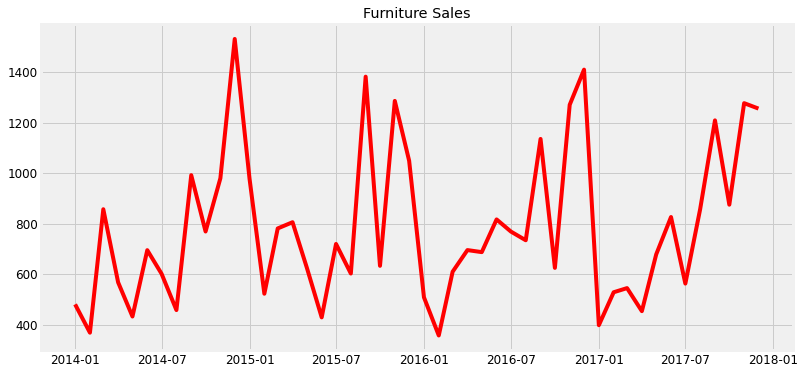

In [20]:
plt.figure(figsize=(12,6))
fig=plt.plot(yf,color='r')
plt.title("Furniture Sales")

**Office Supplies**

Text(0.5, 1.0, 'Office_Supplies Sales')

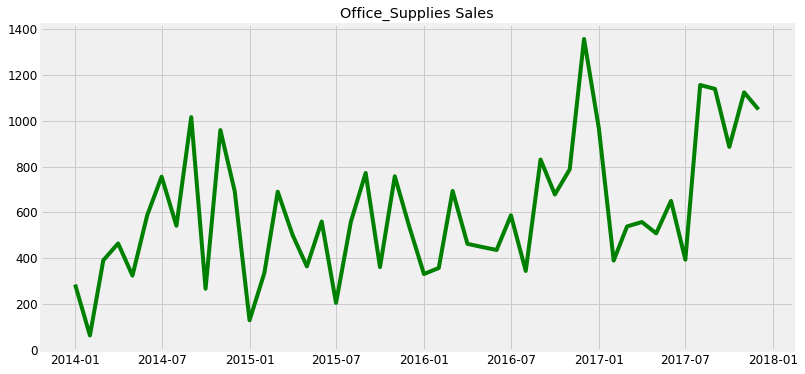

In [21]:
yo=Office_Supplies['Sales'].resample('MS').mean()
yo
plt.figure(figsize=(12,6))
fig=plt.plot(yo,color='g')
plt.title("Office_Supplies Sales")

**Technology**

Text(0.5, 1.0, 'Technology Sales')

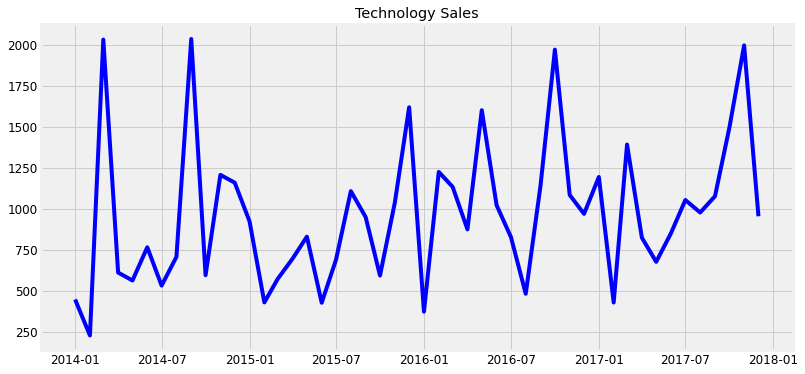

In [22]:
yt=technology['Sales'].resample('MS').mean()
yt
plt.figure(figsize=(12,6))
fig=plt.plot(yt,color='b')
plt.title("Technology Sales")

Printing the seasonal ARIMA model,Time series forecasting with arima 

**Decomposition**

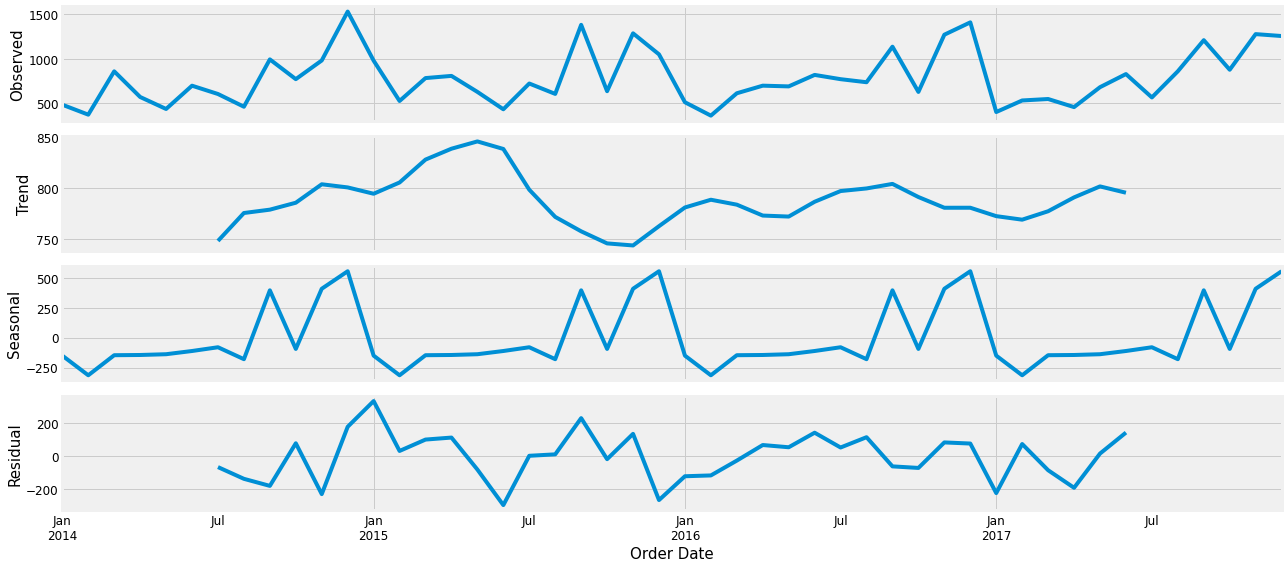

In [23]:
from pylab import rcParams
rcParams['figure.figsize']=18,8
decomposition=sm.tsa.seasonal_decompose(yf,model='addictive')
fig=decomposition.plot()
plt.show()

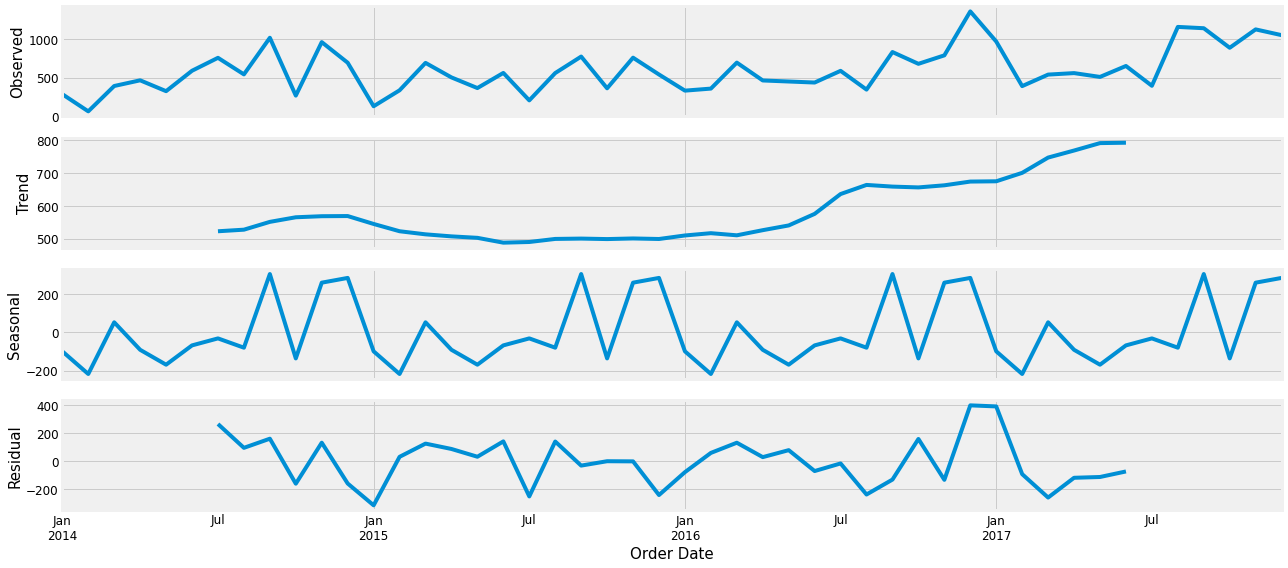

In [24]:
from pylab import rcParams
rcParams['figure.figsize']=18,8
decomposition=sm.tsa.seasonal_decompose(yo,model='addictive')
fig=decomposition.plot()
plt.show()

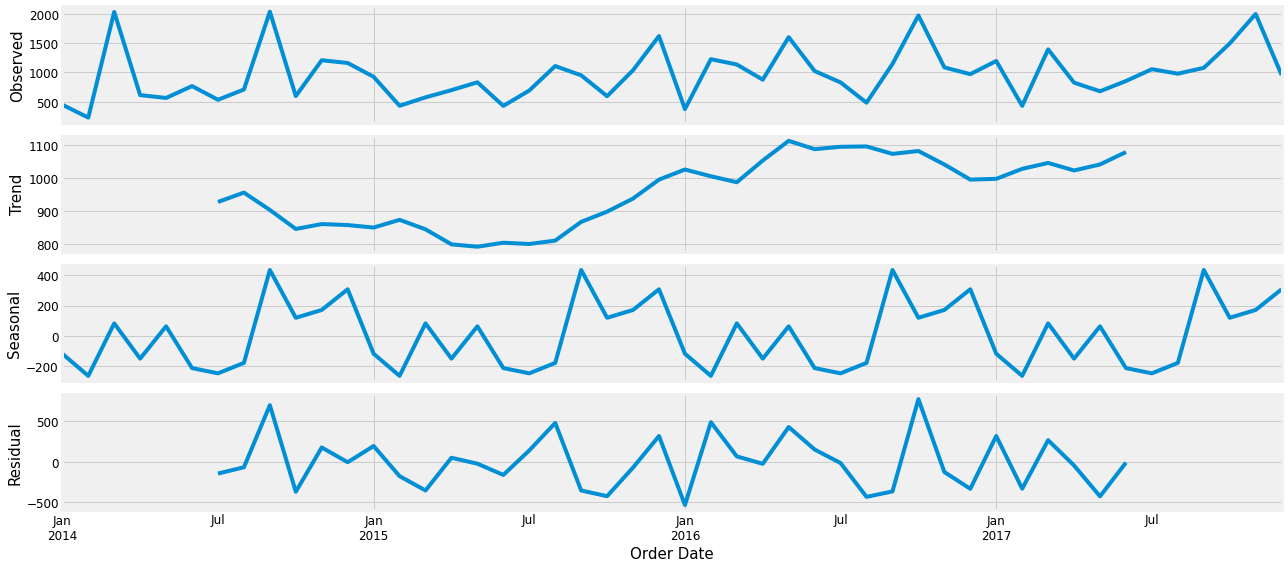

In [25]:
from pylab import rcParams
rcParams['figure.figsize']=18,8
decomposition=sm.tsa.seasonal_decompose(yt,model='addictive')
fig=decomposition.plot()
plt.show()

**pdq Parameter Estimation**

In [26]:
#pdq parameter estimation
p=d=q=range(0,2)
pdq=list(itertools.product(p,d,q))
seasonal_pdq=[(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]
print('Example of parameter combination for Seasonal ARIMA...')
print('SARIMAX:{}X{}'.format(pdq[1],seasonal_pdq[1]))
print('SARIMAX:{}X{}'.format(pdq[1],seasonal_pdq[2]))
print('SARIMAX:{}X{}'.format(pdq[2],seasonal_pdq[3]))
print('SARIMAX:{}X{}'.format(pdq[2],seasonal_pdq[4]))

Example of parameter combination for Seasonal ARIMA...
SARIMAX:(0, 0, 1)X(0, 0, 1, 12)
SARIMAX:(0, 0, 1)X(0, 1, 0, 12)
SARIMAX:(0, 1, 0)X(0, 1, 1, 12)
SARIMAX:(0, 1, 0)X(1, 0, 0, 12)


**Furniture**

ARIMA(0, 0, 0)X(0, 0, 0, 12)12-AIC:769.0817523205916
ARIMA(0, 0, 0)X(0, 0, 1, 12)12-AIC:1291.1586461285508
ARIMA(0, 0, 0)X(0, 1, 0, 12)12-AIC:477.71701309202774
ARIMA(0, 0, 0)X(1, 0, 0, 12)12-AIC:497.2314433418337
ARIMA(0, 0, 0)X(1, 0, 1, 12)12-AIC:1341.4774825752884
ARIMA(0, 0, 0)X(1, 1, 0, 12)12-AIC:318.0047199116341
ARIMA(0, 0, 1)X(0, 0, 0, 12)12-AIC:720.9252270758116
ARIMA(0, 0, 1)X(0, 0, 1, 12)12-AIC:2890.3956414293407
ARIMA(0, 0, 1)X(0, 1, 0, 12)12-AIC:466.5607429809134
ARIMA(0, 0, 1)X(1, 0, 0, 12)12-AIC:499.5815754980983
ARIMA(0, 0, 1)X(1, 0, 1, 12)12-AIC:2592.49103021319
ARIMA(0, 0, 1)X(1, 1, 0, 12)12-AIC:319.98848769468657
ARIMA(0, 1, 0)X(0, 0, 0, 12)12-AIC:677.894766843944
ARIMA(0, 1, 0)X(0, 0, 1, 12)12-AIC:1354.9157815720205
ARIMA(0, 1, 0)X(0, 1, 0, 12)12-AIC:486.6378567198382
ARIMA(0, 1, 0)X(1, 0, 0, 12)12-AIC:497.78896630044073
ARIMA(0, 1, 0)X(1, 0, 1, 12)12-AIC:1006.8019521666
ARIMA(0, 1, 0)X(1, 1, 0, 12)12-AIC:319.7714068109211
ARIMA(0, 1, 1)X(0, 0, 0, 12)12-AIC:649.9056

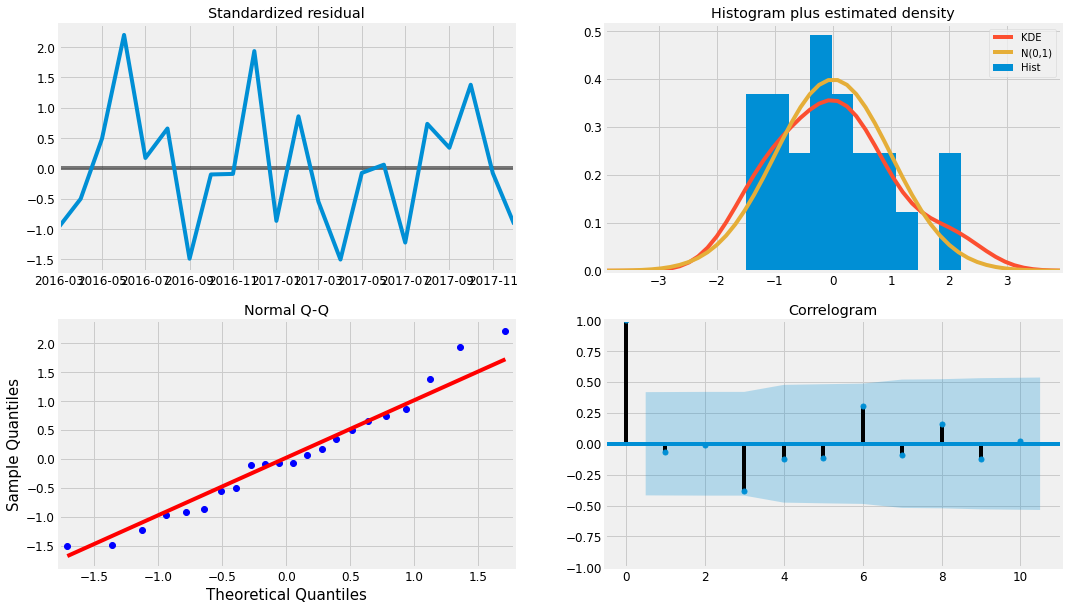

In [27]:
warnings.filterwarnings("ignore")
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod=sm.tsa.statespace.SARIMAX(yf,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results_f=mod.fit()
            print('ARIMA{}X{}12-AIC:{}'.format(param,param_seasonal,results_f.aic))
        except:
            continue 
mod=sm.tsa.statespace.SARIMAX(yf,order=(1, 1, 1),seasonal_order=(1,1,0,12),enforce_stationarity=False,enforce_invertibility=False)
results_f=mod.fit()
print(results_f.summary().tables[1])
results_f.plot_diagnostics(figsize=(16,10))
plt.show()

**Office_Sales**

ARIMA(0, 0, 0)X(0, 0, 0, 12)12-AIC:747.1990404227043
ARIMA(0, 0, 0)X(0, 0, 1, 12)12-AIC:1339.2866936144285
ARIMA(0, 0, 0)X(0, 1, 0, 12)12-AIC:500.7335398750499
ARIMA(0, 0, 0)X(1, 0, 0, 12)12-AIC:516.0876543936832
ARIMA(0, 0, 0)X(1, 0, 1, 12)12-AIC:1379.0108942478607
ARIMA(0, 0, 0)X(1, 1, 0, 12)12-AIC:347.44488563489716
ARIMA(0, 0, 1)X(0, 0, 0, 12)12-AIC:702.6891395292488
ARIMA(0, 0, 1)X(0, 0, 1, 12)12-AIC:2910.3517519550014
ARIMA(0, 0, 1)X(0, 1, 0, 12)12-AIC:487.7601415814767
ARIMA(0, 0, 1)X(1, 0, 0, 12)12-AIC:517.4952646585639
ARIMA(0, 0, 1)X(1, 0, 1, 12)12-AIC:2985.4855645706784
ARIMA(0, 0, 1)X(1, 1, 0, 12)12-AIC:345.69220944601386
ARIMA(0, 1, 0)X(0, 0, 0, 12)12-AIC:666.4572045007284
ARIMA(0, 1, 0)X(0, 0, 1, 12)12-AIC:1387.9678024639782
ARIMA(0, 1, 0)X(0, 1, 0, 12)12-AIC:503.08407475562086
ARIMA(0, 1, 0)X(1, 0, 0, 12)12-AIC:500.0109385290892
ARIMA(0, 1, 0)X(1, 0, 1, 12)12-AIC:1325.5583803783738
ARIMA(0, 1, 0)X(1, 1, 0, 12)12-AIC:335.7148959418817
ARIMA(0, 1, 1)X(0, 0, 0, 12)12-AIC:63

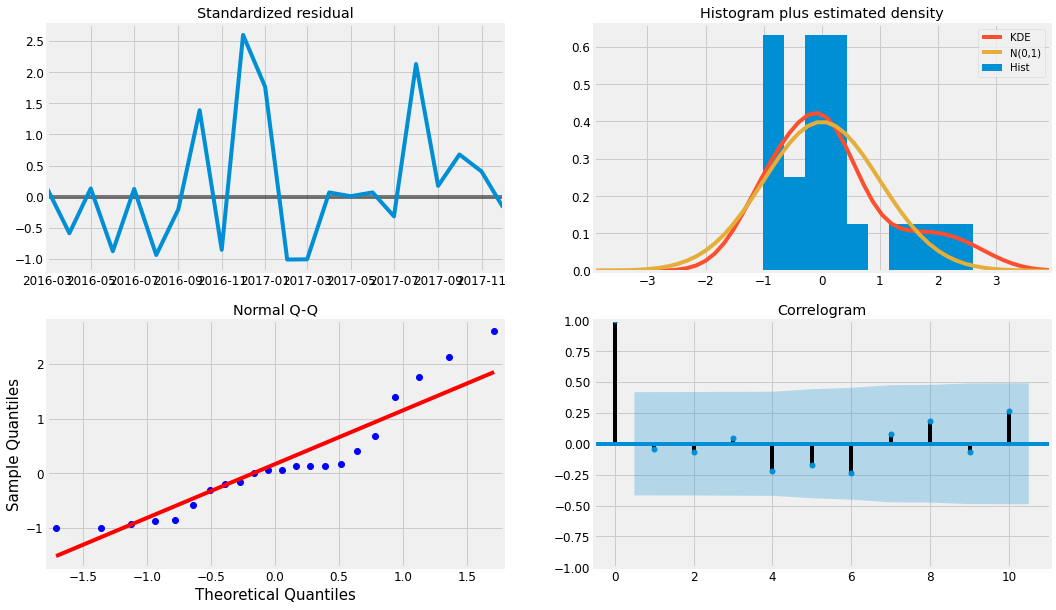

In [28]:
warnings.filterwarnings("ignore")
for param in pdq :
    for param_seasonal in seasonal_pdq:
        try:
            mod=sm.tsa.statespace.SARIMAX(yo,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results_o=mod.fit()
            print('ARIMA{}X{}12-AIC:{}'.format(param,param_seasonal,results_o.aic))
        except:
            continue
mod=sm.tsa.statespace.SARIMAX(yo,order=(1,1,1),seasonal_order=(1,1,0,12),enforce_stationarity=False,enforce_invertibility=False)
results_o=mod.fit()
print(results_o.summary().tables[1])
results_o.plot_diagnostics(figsize=(16,10))
plt.show()

**Technology**

ARIMA(0, 0, 0)X(0, 0, 0, 12)12-AIC:791.4891765009955
ARIMA(0, 0, 0)X(0, 0, 1, 12)12-AIC:1573.3324749256087
ARIMA(0, 0, 0)X(0, 1, 0, 12)12-AIC:549.0156237882128
ARIMA(0, 0, 0)X(1, 0, 0, 12)12-AIC:564.1031529698098
ARIMA(0, 0, 0)X(1, 0, 1, 12)12-AIC:542.9210079120224
ARIMA(0, 0, 0)X(1, 1, 0, 12)12-AIC:372.6612068172691
ARIMA(0, 0, 1)X(0, 0, 0, 12)12-AIC:750.8969484750884
ARIMA(0, 0, 1)X(0, 0, 1, 12)12-AIC:2833.2040804417334
ARIMA(0, 0, 1)X(0, 1, 0, 12)12-AIC:535.0489454747606
ARIMA(0, 0, 1)X(1, 0, 0, 12)12-AIC:566.082790402811
ARIMA(0, 0, 1)X(1, 0, 1, 12)12-AIC:526.5322596185086
ARIMA(0, 0, 1)X(1, 1, 0, 12)12-AIC:373.8760065868689
ARIMA(0, 1, 0)X(0, 0, 0, 12)12-AIC:729.3478530237927
ARIMA(0, 1, 0)X(0, 0, 1, 12)12-AIC:1457.955231181008
ARIMA(0, 1, 0)X(0, 1, 0, 12)12-AIC:562.7585881217353
ARIMA(0, 1, 0)X(1, 0, 0, 12)12-AIC:543.3082156228088
ARIMA(0, 1, 0)X(1, 0, 1, 12)12-AIC:1448.8298838210949
ARIMA(0, 1, 0)X(1, 1, 0, 12)12-AIC:377.03544814349607
ARIMA(0, 1, 1)X(0, 0, 0, 12)12-AIC:675.9599

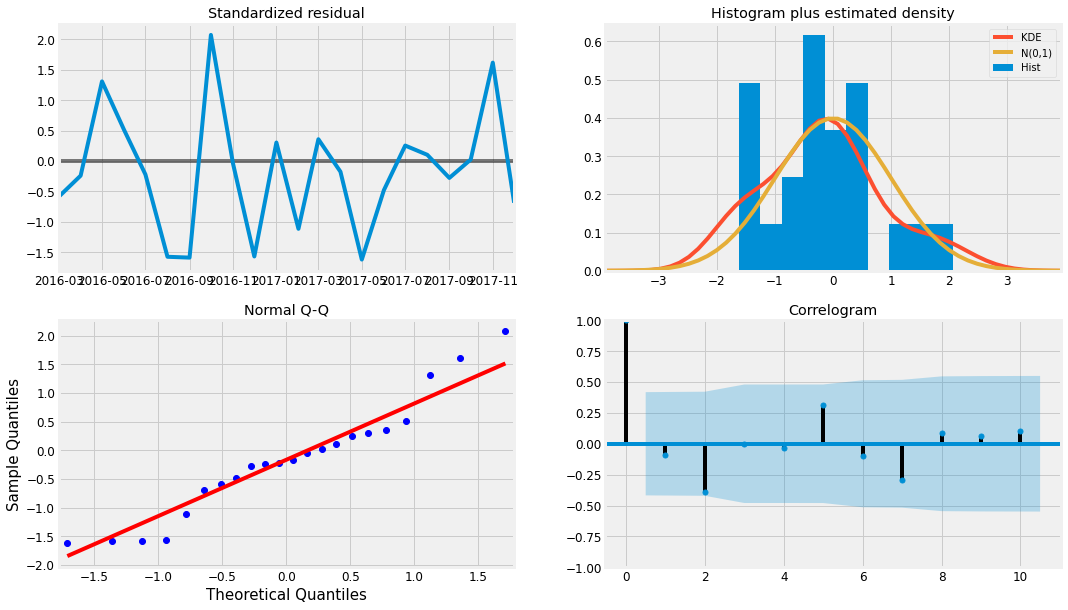

In [29]:
warnings.filterwarnings("ignore")
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod=sm.tsa.statespace.SARIMAX(yt,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results_t=mod.fit()
            print('ARIMA{}X{}12-AIC:{}'.format(param,param_seasonal,results_t.aic))
        except:
            continue 
mod=sm.tsa.statespace.SARIMAX(yt,order=(1, 1, 1),seasonal_order=(1,1,0,12),enforce_stationarity=False,enforce_invertibility=False)
results_t=mod.fit()
print(results_t.summary().tables[1])
results_t.plot_diagnostics(figsize=(16,10))
plt.show()

**Prediction**

**Furniture**

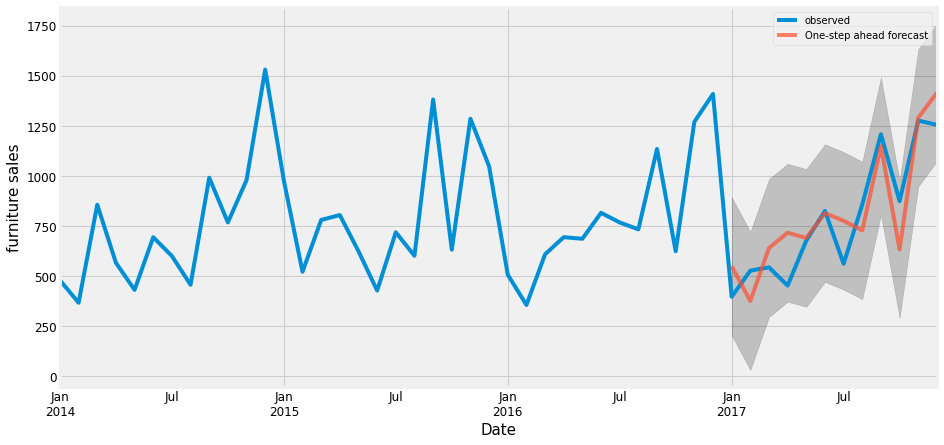

In [30]:
pred=results_f.get_prediction(start=pd.to_datetime('2017-01-01'),dynamic=False)
pred_ci=pred.conf_int()
ax=yf['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax,label='One-step ahead forecast',alpha=.7,figsize=(14,7))
ax.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],color='k',alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('furniture sales')
plt.legend()
plt.show()

**office_supplies**

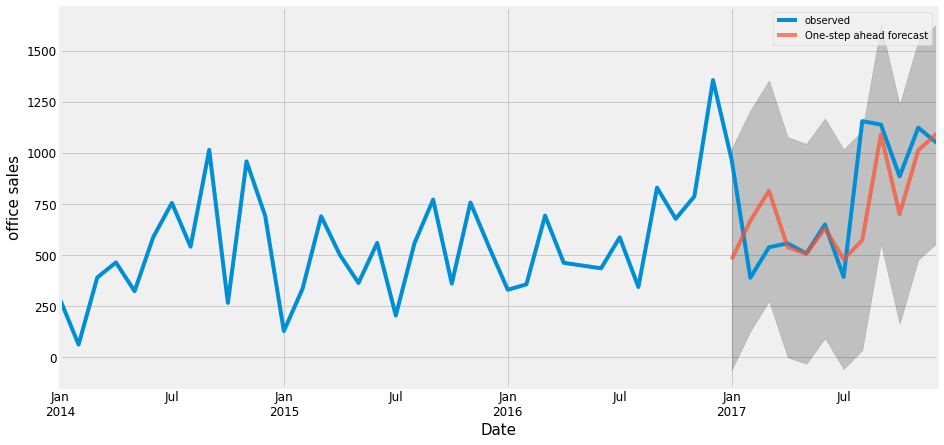

In [31]:
pred=results_o.get_prediction(start=pd.to_datetime('2017-01-01'),dynamic=False)
pred_ci=pred.conf_int()
ax=yo['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax,label='One-step ahead forecast',alpha=.7,figsize=(14,7))
ax.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],color='k',alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('office sales')
plt.legend()
plt.show()

**Technology**

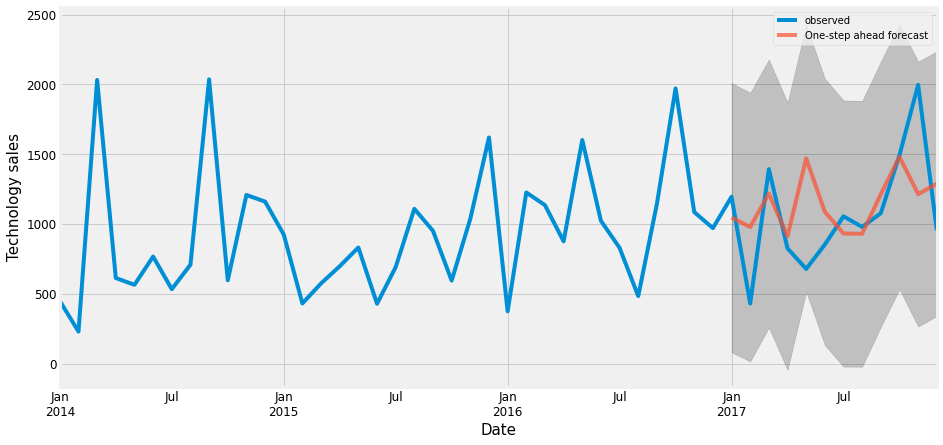

In [32]:
pred=results_t.get_prediction(start=pd.to_datetime('2017-01-01'),dynamic=False)
pred_ci=pred.conf_int()
ax=yt['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax,label='One-step ahead forecast',alpha=.7,figsize=(14,7))
ax.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],color='k',alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Technology sales')
plt.legend()
plt.show()